### Spacial Location:

* Lots of upstream vectors at sunset
* upstream vectors during snowy conditions

### Vector Angle Variablity: 

process: 

* for each row in dataframe, took the differences of the point with each of eight surrounding points, computed variance

results: 

* there is more variability for shorter vectors

In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('temp_UWRL_river_velocimetry_dataset.csv')
df

,datetime,y,x,v_x,v_y,v_len,s2n,corr,sun_altitude,sun_azimuth,...,vegetation,visibility,cloudcover,solarradiation,uvindex,conditions,v_pos,v_downstream,angle,angle_var
0,2024-01-01 07:51:43,0.155,20.045,-0.038130,-2.439024e-04,0.038131,3.10576,0.50904,-0.009858,2.099355,...,none,3.8,0.0,4,0,Clear,-1,-1,-3.135196e+00,NaN
1,2024-01-01 07:51:43,9.645,0.675,NaN,NaN,NaN,0.00000,0.00000,-0.009858,2.099355,...,none,3.8,0.0,4,0,Clear,0,0,NaN,NaN
2,2024-01-01 07:51:43,9.645,0.805,NaN,NaN,NaN,0.00000,0.00000,-0.009858,2.099355,...,none,3.8,0.0,4,0,Clear,0,0,NaN,NaN
3,2024-01-01 07:51:43,9.645,0.935,NaN,NaN,NaN,0.00000,0.00000,-0.009858,2.099355,...,none,3.8,0.0,4,0,Clear,0,0,NaN,NaN
4,2024-01-01 07:51:43,9.645,1.065,NaN,NaN,NaN,0.00000,0.00000,-0.009858,2.099355,...,none,3.8,0.0,4,0,Clear,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9299131,2024-05-23 14:28:18,9.645,0.675,NaN,NaN,NaN,0.00000,0.00000,0.986269,4.205211,...,light,9.9,99.6,591,6,Overcast,0,0,NaN,NaN
9299132,2024-05-23 14:28:18,9.645,0.545,NaN,NaN,NaN,0.00000,0.00000,0.986269,4.205211,...,light,9.9,99.6,591,6,Overcast,0,0,NaN,NaN
9299133,2024-05-23 14:28:18,9.645,0.415,NaN,NaN,NaN,0.00000,0.00000,0.986269,4.205211,...,light,9.9,99.6,591,6,Overcast,0,0,NaN,NaN
9299134,2024-05-23 14:28:18,9.645,6.005,0.017920,-1.859624e-18,0.017920,3.04712,0.46504,0.986269,4.205211,...,light,9.9,99.6,591,6,Overcast,1,1,-1.037736e-16,NaN


In [5]:
df.datetime = pd.to_datetime(df.datetime)

df['year'] = [int(x.year) for x in df.datetime]
df['month'] = [int(x.month) for x in df.datetime]
df['day'] = [int(x.day) for x in df.datetime]
df['hour'] = [int(x.hour) for x in df.datetime]

In [6]:
sunrise, sunset = [], []
for month in sorted(df.month.unique()):
    df_month = df[df.month == month]

    for day in sorted(df_month.day.unique()):
        df_day = df_month[df_month.day == day]

        times_sorted = sorted(df_day.datetime.unique())

        sunrise.append(times_sorted.pop(0))
        sunset.append(times_sorted.pop(-1))

df['sunrise_sunset'] = ['sunrise' if x in sunrise else 'sunset' if x in sunset else 'no' for x in df.datetime]

no


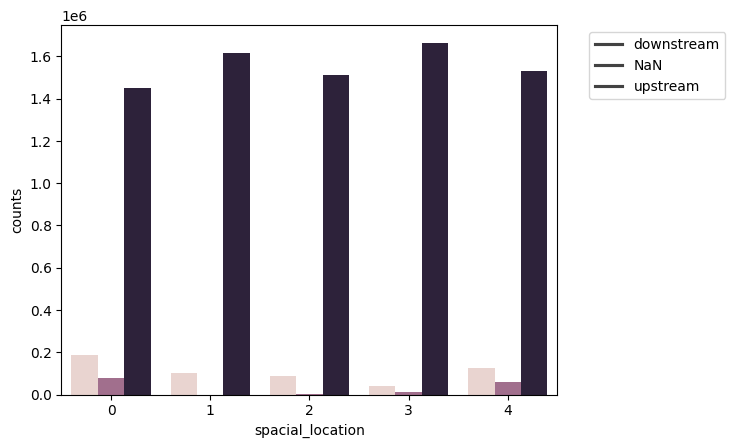

sunrise


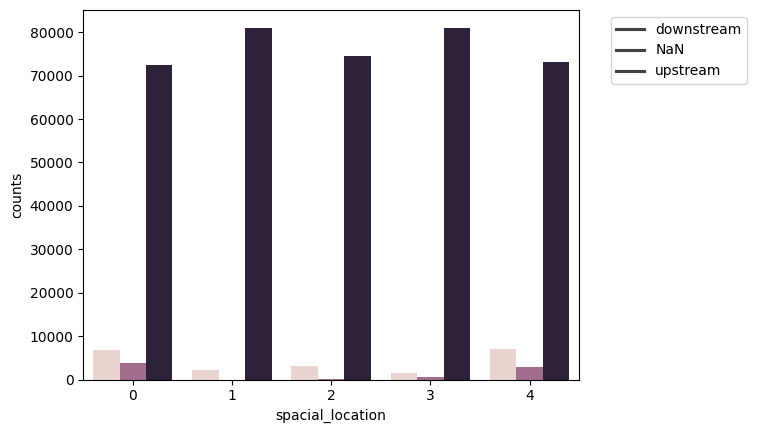

sunset


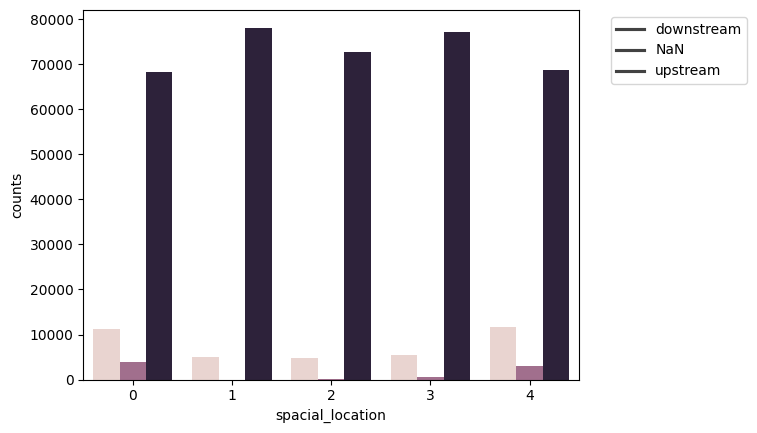

In [10]:
df_ss = df.groupby(['sunrise_sunset', 'spacial_location', 'v_downstream']).size().reset_index(name='counts')

for x in df_ss.sunrise_sunset.unique():

    print(x)

    sns.barplot(
        data=df_ss[df_ss.sunrise_sunset == x],
        x='spacial_location',
        y='counts',
        hue='v_downstream'
    )
    plt.legend(labels=['downstream', 'NaN', 'upstream'], bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    plt.close()


In [11]:
df2 = df[~(df.angle_var.isna())]

In [12]:
df2[['v_x', 'v_len', 'angle', 'angle_var']]

,v_x,v_len,angle,angle_var
7,-0.036179,0.070412,2.110424,7.816415
11,0.000000,0.000000,0.000000,0.000000
12,0.000000,0.000000,0.000000,0.000000
13,-0.002000,0.002000,3.141593,0.000000
14,-0.001040,0.023463,-1.615136,4.680522
...,...,...,...,...
273346,-0.012720,0.020692,-2.232857,1.526814
273347,-0.003468,0.011965,-1.864835,0.421622
273390,0.000968,0.001313,-0.741947,1.744681
273416,0.003520,0.012122,-1.276179,0.713504


<Axes: xlabel='v_len', ylabel='angle_var'>

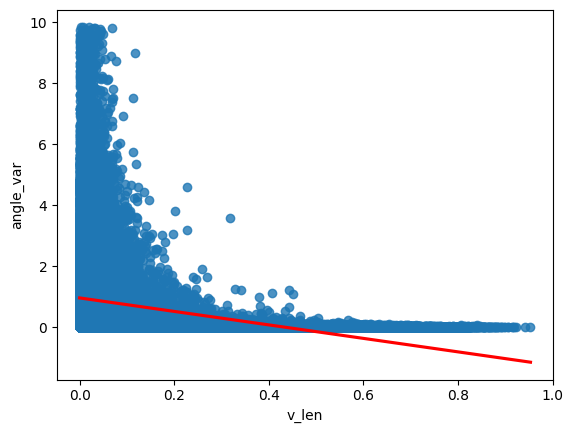

In [13]:
sns.regplot(
    data=df2,
    x='v_len',
    y='angle_var',
    line_kws={'color': 'red'}
)

<Axes: xlabel='v_len', ylabel='angle_var'>

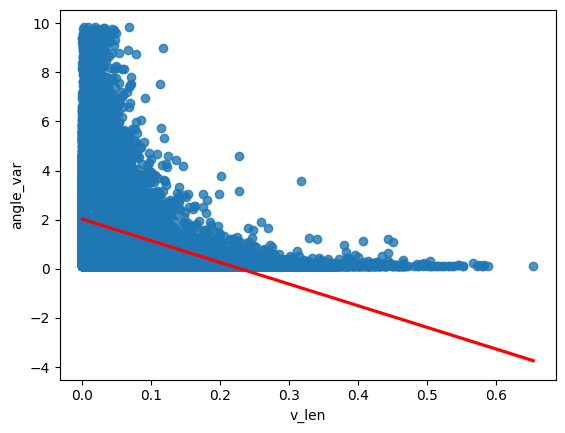

In [14]:
sns.regplot(
    data=df2[df2.angle_var > .1],
    x='v_len',
    y='angle_var',
    line_kws={'color': 'red'}
)

<Axes: xlabel='angle_var', ylabel='Count'>

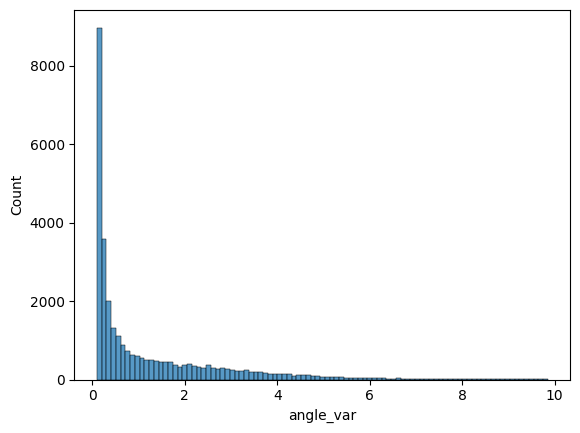

In [15]:
sns.histplot(
    data=df2[df2.angle_var > .1],
    x='angle_var'
)

<Axes: xlabel='v_len', ylabel='angle_var'>

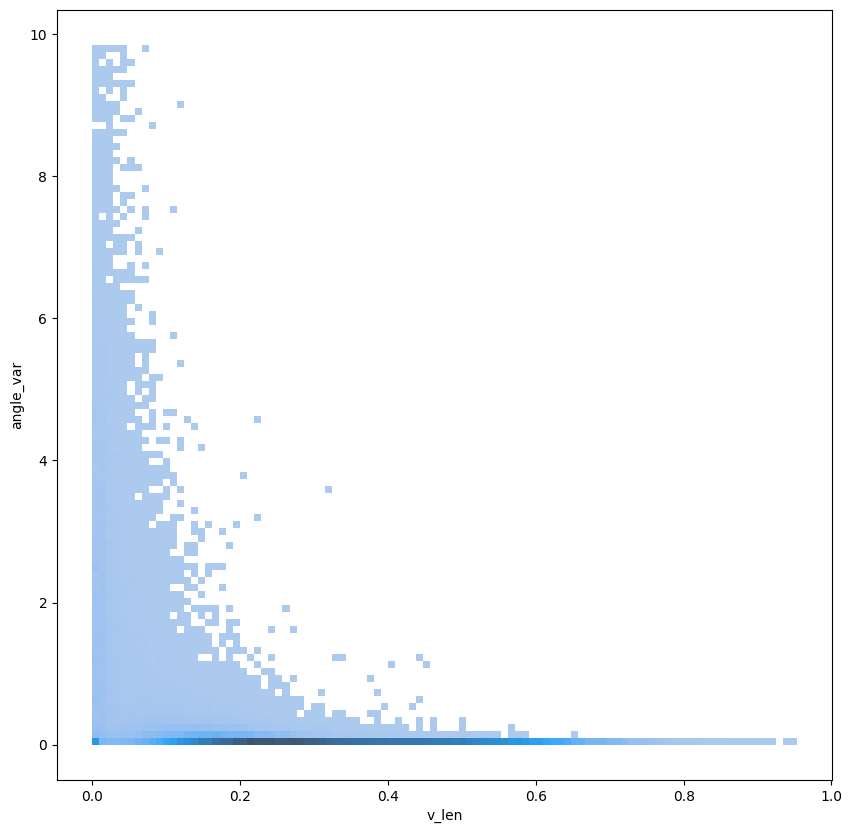

In [16]:
plt.figure(figsize=(10, 10))

sns.histplot(
    data=df2,
    x='v_len',
    y='angle_var',
    bins=100
)

<Axes: xlabel='v_len', ylabel='angle_var'>

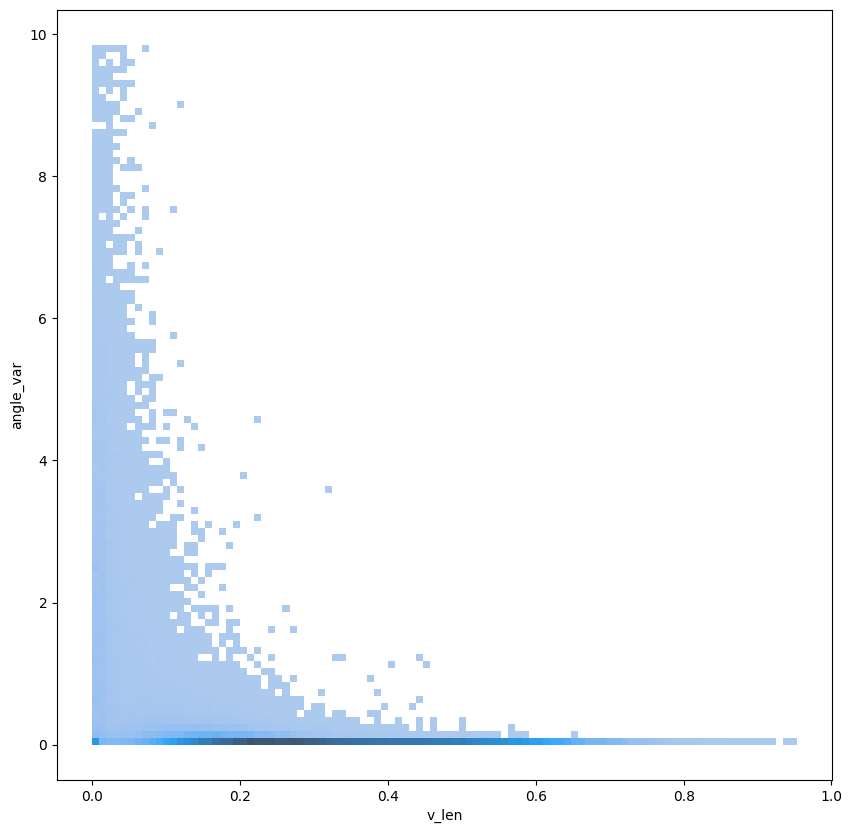

In [17]:
plt.figure(figsize=(10, 10))

sns.histplot(
    data=df2[df2.cloudcover == 0],
    x='v_len',
    y='angle_var',
    bins=100
)

<Axes: xlabel='v_len', ylabel='angle_var'>

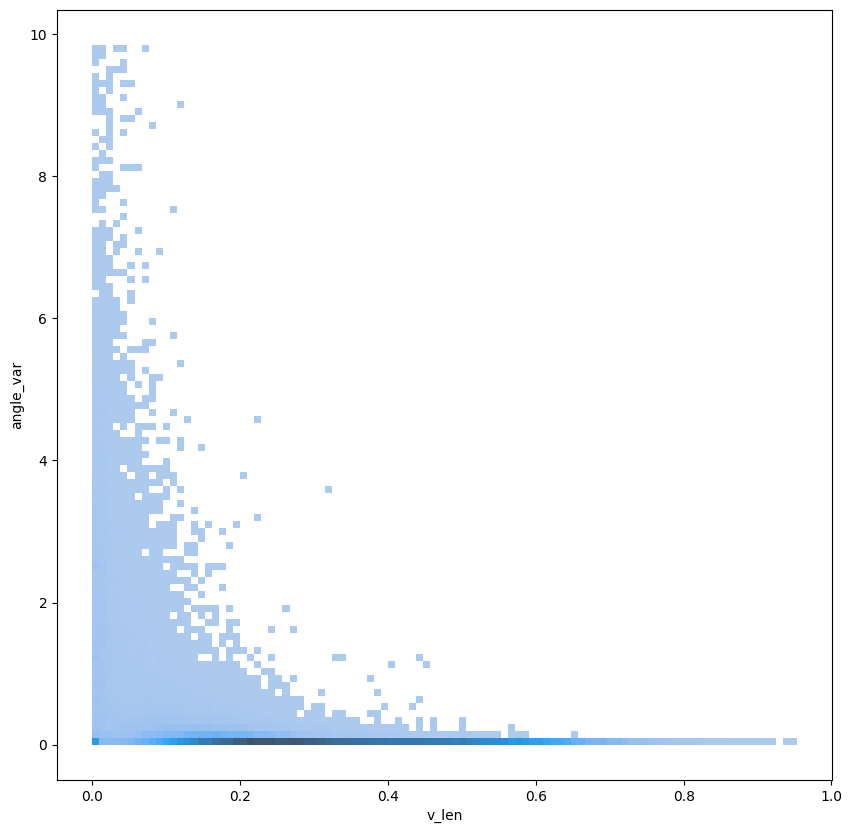

In [18]:
plt.figure(figsize=(10, 10))

sns.histplot(
    data=df2[df2.v_x >= 0],
    x='v_len',
    y='angle_var',
    bins=100
)

### TODO

* Chat with support for computer
* Look at river cross sections with angle_var filter
* Look at distribution of angles for subsets of river (rectangle of _good_ results)